In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [25]:
from utils.plotUtils.function import crystalball

f = crystalball(mu=122.88, sigma=-13.44, beta=83, m=138.8, n=5/2)

In [26]:
f(6)

3.771089043081512e-17

(<Figure size 650x650 with 1 Axes>, <AxesSubplot:>)

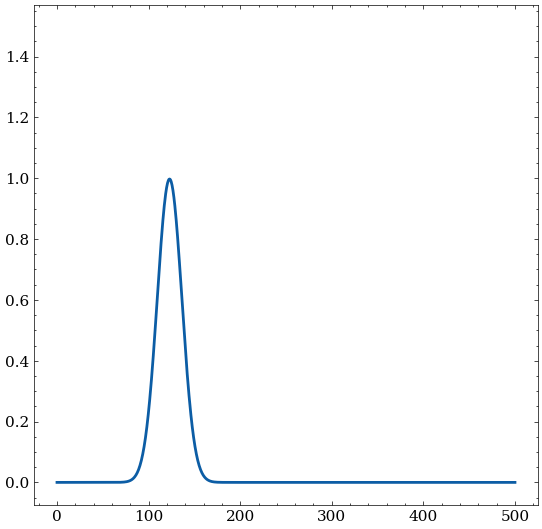

In [27]:
x = np.linspace(0,500, 1000)
y = f(x)

graph_array(x,y)

In [28]:
X = np.random.uniform(x[0], x[-1],size=(2,10000))

In [29]:
Y = f(X)
Y = 1 - Y/Y.max()

In [30]:
hx = Histo2D.from_array(*X, weights=Y[0])
hx_unweighted = Histo2D.from_array(*X)
hx.histo2d /= hx_unweighted.histo2d

In [31]:
hy = Histo2D.from_array(*X, weights=Y[1])
hy_unweighted = Histo2D.from_array(*X)
hy.histo2d /= hy_unweighted.histo2d

(<Figure size 960x400 with 4 Axes>, <AxesSubplot:>)

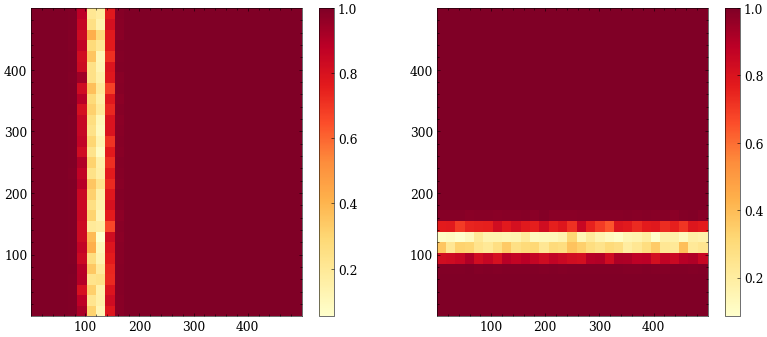

In [32]:
fig, axs = study.get_figax(2)

plot_histo2d(hx, colorbar=True, figax=(fig,axs[0]))
plot_histo2d(hy, colorbar=True, figax=(fig,axs[1]))

(<Figure size 650x650 with 2 Axes>, <AxesSubplot:>)

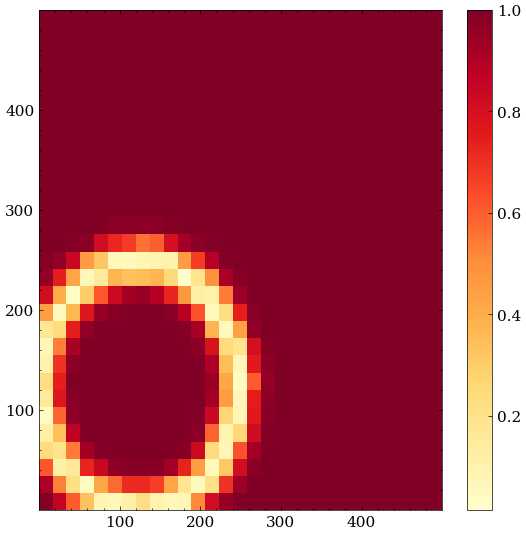

In [33]:
r = np.sqrt( np.sum( (X/125 - 1)**2, axis=0) ) * 125
y_r = f(r)

y_r = 1 - y_r/y_r.max()

hr = Histo2D.from_array(*X, weights=y_r)
hr_unweighted = Histo2D.from_array(*X)
hr.histo2d /= hr_unweighted.histo2d
plot_histo2d(hr, colorbar=True)

(<Figure size 650x650 with 2 Axes>, <AxesSubplot:>)

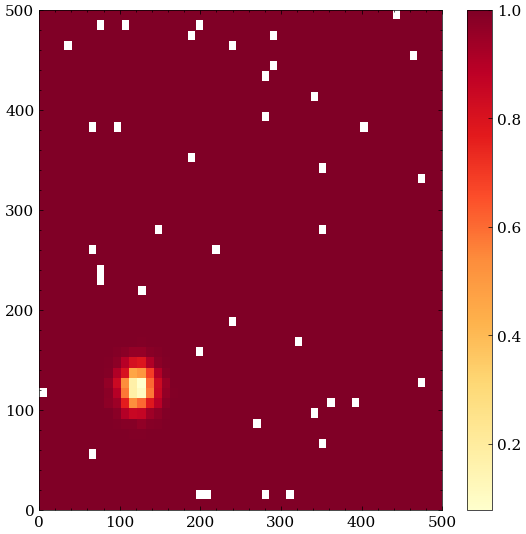

In [55]:
Y = f(X)
y_max = (np.prod(Y, axis=0))

y_max = 1 - y_max/y_max.max()

hr = Histo2D.from_array(*X, weights=y_max, x_bins=(0,500,50), y_bins=(0,500,50))

hr_x = hr.project_x(histtype='step')
hr_y = hr.project_y(histtype='step')

hr_unweighted = Histo2D.from_array(*X, x_bins=hr.x_bins, y_bins=hr.y_bins)
hr.histo2d /= hr_unweighted.histo2d

hr_x.histo /= hr_unweighted.project_x().histo
hr_y.histo /= hr_unweighted.project_y().histo

plot_histo2d(hr, colorbar=True)

(<Figure size 650x650 with 1 Axes>, <AxesSubplot:>)

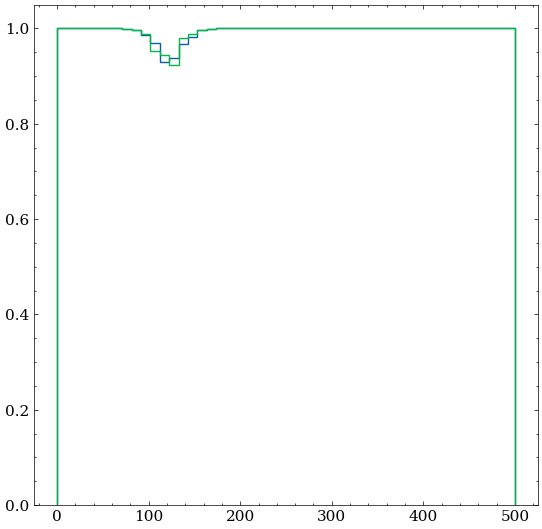

In [56]:
plot_histos(
    [hr_x, hr_y],
    errors=False,
)

(<Figure size 650x650 with 2 Axes>, <AxesSubplot:>)

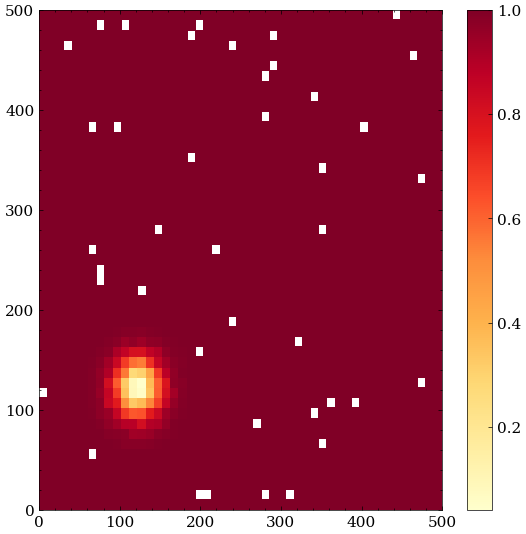

In [53]:
Y = f(X)
y_max = np.sqrt(np.prod(Y, axis=0))

y_max = 1 - y_max/y_max.max()

hr = Histo2D.from_array(*X, weights=y_max, x_bins=(0,500,50), y_bins=(0,500,50))

hr_x = hr.project_x(histtype='step')
hr_y = hr.project_y(histtype='step')

hr_unweighted = Histo2D.from_array(*X, x_bins=hr.x_bins, y_bins=hr.y_bins)
hr.histo2d /= hr_unweighted.histo2d

hr_x.histo /= hr_unweighted.project_x().histo
hr_y.histo /= hr_unweighted.project_y().histo

plot_histo2d(hr, colorbar=True)

(<Figure size 650x650 with 1 Axes>, <AxesSubplot:>)

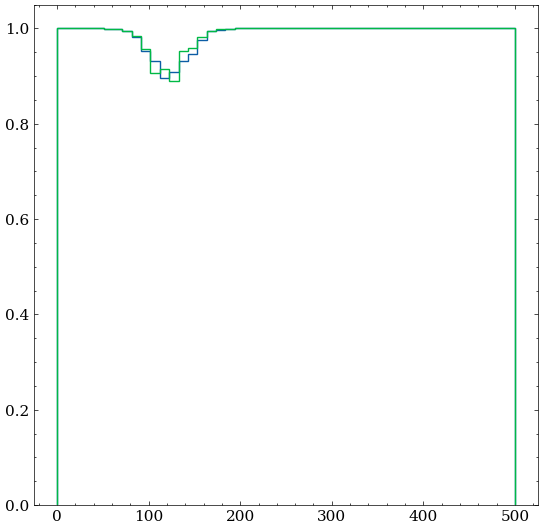

In [54]:
plot_histos(
    [hr_x, hr_y],
    errors=False,
)

In [41]:
z = np.random.uniform(0,1,size=(2,10000))
zp = np.prod(z, axis=0)

np.mean(z), np.mean(zp)

(0.5008975151876187, 0.2503058974529827)

array([2.59972770e-05, 7.06308354e-01, 8.25454332e-01, ...,
       6.47918671e-01, 6.10072674e-01, 4.66845976e-01])

(<Figure size 650x650 with 1 Axes>,
 <AxesSubplot:ylabel='Events'>,
 HistoList<[<utils.plotUtils.histogram.Histo object at 0x7f319c14ae50>, <utils.plotUtils.histogram.Histo object at 0x7f318bcc1310>, <utils.plotUtils.histogram.Histo object at 0x7f319c177fd0>]>)

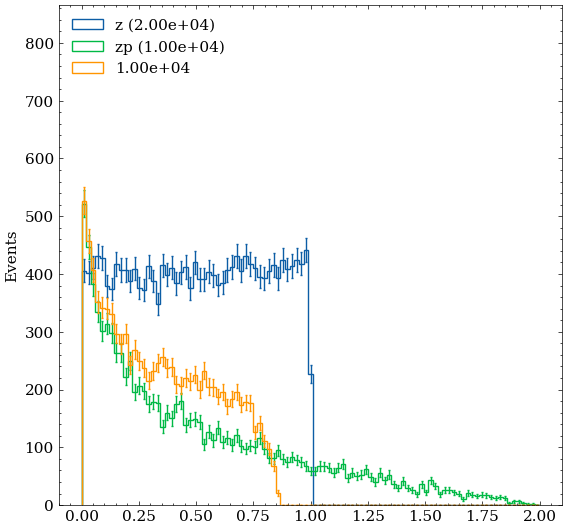

In [38]:
histo_arrays(
    [z, zp,1-np.exp(-zp)],
    h_label=['z', 'zp'],
    bins=(0,2,100),
    h_histtype='step',
    legend=True,
)